In [63]:
import pandas as pd
from darts import TimeSeries
import numpy as np

In [78]:
######## CASE 1 PREDICTING SALES BASED ON HISTORIC DATA OF THE SERIES

In [96]:
### load data
df = pd.read_csv('TS_BJsales.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [97]:
df.columns = ["Sales"]

In [98]:
begin_Date = '2019-10-16'
df["Date"] = pd.date_range(begin_Date, periods=len(df["Sales"]))
#df = df.set_index("Date")

In [99]:
df

,Sales,Date
0,200.1,2019-10-16
1,199.5,2019-10-17
2,199.4,2019-10-18
3,198.9,2019-10-19
4,199.0,2019-10-20
...,...,...
145,263.3,2020-03-09
146,262.8,2020-03-10
147,261.8,2020-03-11
148,262.2,2020-03-12


In [100]:
### Since the data is daily lets transform it into a ts with this freq
series = TimeSeries.from_dataframe(df,time_col ='Date', value_cols = 'Sales')

In [101]:
series

                0
Date             
2019-10-16  200.1
2019-10-17  199.5
2019-10-18  199.4
2019-10-19  198.9
2019-10-20  199.0
...           ...
2020-03-09  263.3
2020-03-10  262.8
2020-03-11  261.8
2020-03-12  262.2
2020-03-13  262.7

[150 rows x 1 columns]
Freq: D

#### fitting an exponential smoothing

In [128]:
#### splitting our data into trainning and validating
from darts.models import ExponentialSmoothing

train, val = series.split_before(pd.Timestamp('20200220'))
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

/Users/analuizapessoa/anaconda3/envs/forecasting/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [129]:
train

                0
Date             
2019-10-16  200.1
2019-10-17  199.5
2019-10-18  199.4
2019-10-19  198.9
2019-10-20  199.0
...           ...
2020-02-15  259.8
2020-02-16  259.0
2020-02-17  258.9
2020-02-18  257.4
2020-02-19  257.7

[127 rows x 1 columns]
Freq: D

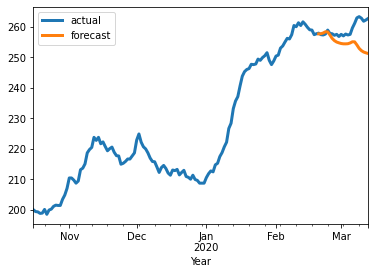

In [130]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

#### fitting an arima

In [131]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

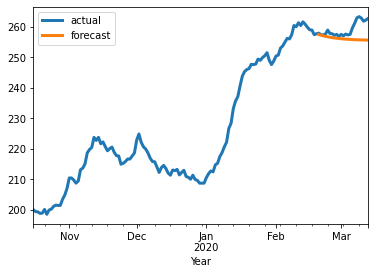

In [132]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

In [133]:
### fitting prophet model 

In [134]:
### predicting how many houses i'm going to sell next quarter
from darts.models import Prophet
m = Prophet()
m.fit(train)
prediction_prophet = m.predict(len(val))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


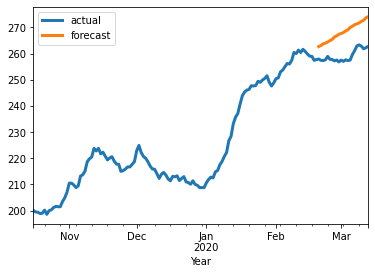

In [135]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction_prophet.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

In [136]:
####### CASSE 2 - PREDICTING DATA BASED ON MANY DIFFERENT EXOGENOUS VARIABLES 

In [147]:
##### forecasting based on other regressors 
### load data
df = pd.read_csv('HousePrices.csv')
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [148]:
df = pd.get_dummies(df, columns=['type'])
#df.drop(["type_unit"], axis = 1, inplace = True)

In [139]:
#df = df.reset_index()

In [140]:
df = df.groupby("saledate").agg({"MA": np.mean, "bedrooms": np.mean, "type_house" : np.sum, "type_unit": np.sum})

In [141]:
### transforming into time series
series = TimeSeries.from_dataframe(df,time_col ='saledate', value_cols = ['type_house'])

KeyError: 'saledate'

In [92]:
df

,saledate,MA,bedrooms,type_house,type_unit
0,30/06/2007,446359.000000,3.000000,2,1
1,30/06/2008,482205.000000,2.857143,4,3
2,30/06/2009,494136.714286,2.857143,4,3
3,30/06/2010,511092.428571,2.857143,4,3
4,30/06/2011,527609.714286,2.857143,4,3
5,30/06/2012,529382.428571,2.857143,4,3
6,30/06/2013,537260.428571,2.857143,4,3
7,30/06/2014,545035.000000,2.857143,4,3
8,30/06/2015,565128.571429,2.857143,4,3
9,30/06/2016,585585.857143,2.857143,4,3


In [94]:
### predicting how many houses i'm going to sell next quarter
from darts.models import Prophet
train, val = series.split_before(pd.Timestamp('20150101'))
m = Prophet()
#m.add_regressor('bedrooms')
#m.add_regressor('add2')
m.fit(train)
prediction_prophet = m.predict(len(val))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [95]:
prediction_prophet

                   0
2015-03-31  3.656107
2015-06-30  3.655515
2015-09-30  4.369424
2015-12-31  4.368463
2016-03-31  4.586033
2016-06-30  4.582916
2016-09-30  4.398792
2016-12-31  4.400074
2017-03-31  4.397198
2017-06-30  4.398547
2017-09-30  4.483737
2017-12-31  4.483985
2018-03-31  4.188582
2018-06-30  4.190907
2018-09-30  4.575535
2018-12-31  4.574922
2019-03-31  3.960681
2019-06-30  3.960089
2019-09-30  4.673998
Freq: Q-DEC

In [88]:
import fbprophet
fbprophet.__version__

'0.6'

In [87]:
type(m)

darts.models.prophet.Prophet